<a href="https://colab.research.google.com/github/drameyjoshi/statistics/blob/master/training/Convergence_of_coin_tosses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

We toss a fair coin $500$ times and record the outcome in an array `tosses`.

In [13]:
n_trials = 500
prob_of_success = 0.5

np.random.seed(12111842)
tosses = scipy.stats.binom.rvs(n = 1, p = prob_of_success, size = n_trials)

As we keep tossing the coin, we also compute the probability of success based on our observations. It is just the number of ones seen until now divided by the number of tosses so far. We observe that our estimates of probability fluctuate a lot before settling down to $p = 0.5$. We can never be sure that the coin was fair until we observe a very large number of trials.

In [14]:
success_so_far = np.cumsum(tosses)
trials = np.linspace(start = 1, stop = n_trials, num = n_trials)
prob_estimate = success_so_far/trials

Text(0.5, 1.0, 'Estimate of probability of success')

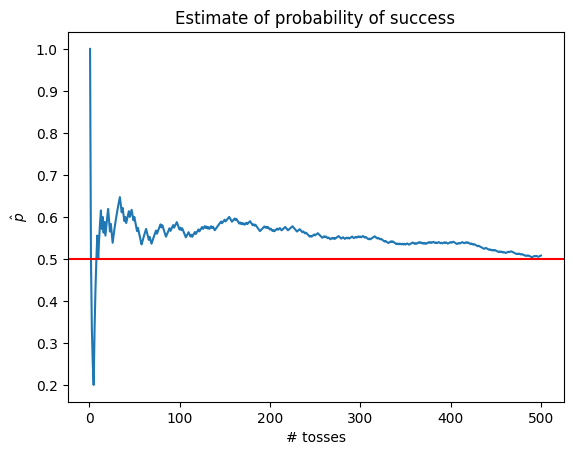

In [15]:
plt.plot(trials, prob_estimate)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlabel('# tosses')
plt.ylabel(r'$\hat{p}$')
plt.title('Estimate of probability of success')

It is interesting to note that even after $400$ tosses we are wondering whether the coin is loaded. Let us now increase the number of trials to $5000$.

Text(0.5, 1.0, 'Estimate of probability of success')

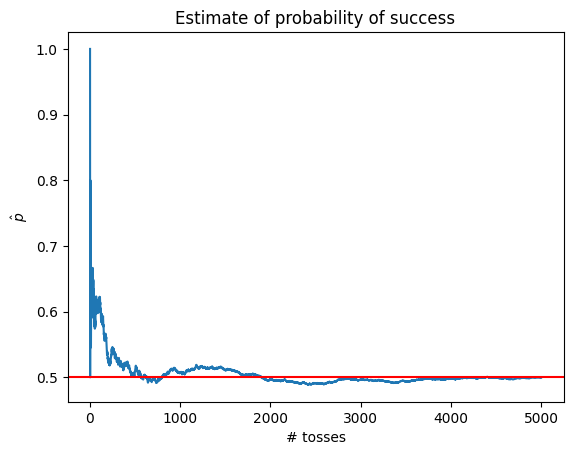

In [16]:
n_trials = 5000
tosses = scipy.stats.binom.rvs(n = 1, p = prob_of_success, size = n_trials)
success_so_far = np.cumsum(tosses)
trials = np.linspace(start = 1, stop = n_trials, num = n_trials)
prob_estimate = success_so_far/trials

plt.plot(trials, prob_estimate)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlabel('# tosses')
plt.ylabel(r'$\hat{p}$')
plt.title('Estimate of probability of success')

Let us decide to take the estimates seriously only after we toss enough number of times, say only after $50$ tosses. We will redraw the plot from $50$ tosses
onward.

Text(0.5, 1.0, 'Estimate of probability of success')

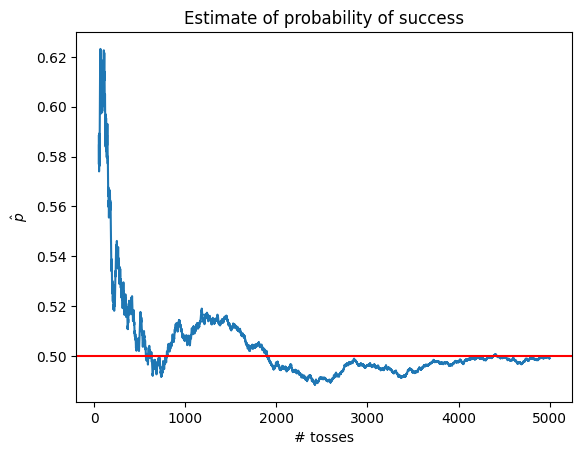

In [18]:
plt.plot(trials[50:], prob_estimate[50:])
plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlabel('# tosses')
plt.ylabel(r'$\hat{p}$')
plt.title('Estimate of probability of success')

In [30]:
first_crossing = np.where(prob_estimate < 0.5)
print("Estimate of probability first dropped below 0.5 after {} trials.".format(first_crossing[0][0]))

Estimate of probability first dropped below 0.5 after 568 trials.


Going by the results of the first $568$ tosses we would have concluded that coin is loaded in favour of success. For a few more tosses we would have derived the opposite conclusion but soon we would have reverted to the same suspicion. We are only seeing a manifestation of a random phenomenon. There is nothing unfair about the coin but by a stroke of chance, for close to $2000$ tosses we believe that the coin is loaded in favour of success. 

Does the estimate eventually settle down to $0.5$? Let us find out by increasin g the number of tosses to $10000$. This time, we plot our estimates only after tossing $500$ times.

Text(0.5, 1.0, 'Estimate of probability of success')

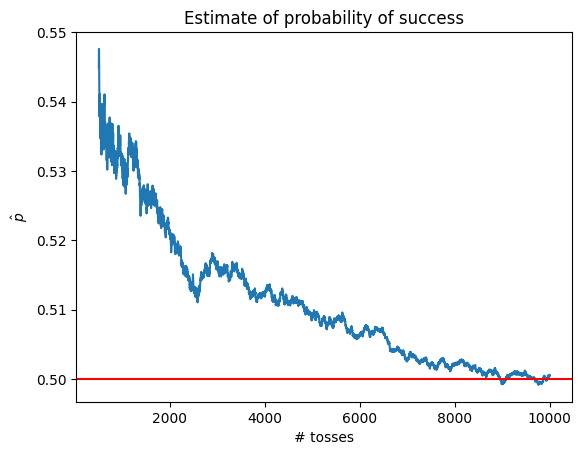

In [33]:
n_trials = 10000
tosses = scipy.stats.binom.rvs(n = 1, p = prob_of_success, size = n_trials)
success_so_far = np.cumsum(tosses)
trials = np.linspace(start = 1, stop = n_trials, num = n_trials)
prob_estimate = success_so_far/trials

plt.plot(trials[500:], prob_estimate[500:])
plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlabel('# tosses')
plt.ylabel(r'$\hat{p}$')
plt.title('Estimate of probability of success')

We surely cannot continue this way. In order to finally decide whether our experience a possible outcome of an experiment with a fair coin we conduct a statistical test.

In [36]:
result = scipy.stats.binomtest(k=success_so_far[n_trials - 1], n = n_trials, p = 0.5)
print("H0: True probability is 0.5.")
max_type1_error = 0.05

print("Results of the test with maximum type 1 error = {}:".format(max_type1_error))
if result.pvalue < max_type1_error:
    print("Reject the null hypothesis.")
else:
    print("Failed to reject the null hypothesis.")

H0: True probability is 0.5.
Results of the test with maximum type 1 error = 0.05:
Failed to reject the null hypothesis.
